<a href="https://colab.research.google.com/github/MathankumarSelvaraj/Intial-Training-of-Python/blob/master/_1_Netflix_Movies_%26_TV_Shows.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Importing the necessory library to perfrom the required task

In [ ]:

#Importing the necessory library to perfrom the required task
import pandas as pd
from plotly.offline import iplot
import plotly.graph_objs as go
import matplotlib.pyplot as plt
import plotly.figure_factory as ff
import seaborn as sns
import numpy as np
# the dataset is stored in variable name 'df'
df = pd.read_csv("netflix_titles.csv")
df.head(5)


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning:

pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.



,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China","September 9, 2019",2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...
1,80117401,Movie,Jandino: Whatever it Takes,NaN,Jandino Asporaat,United Kingdom,"September 9, 2016",2016,TV-MA,94 min,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...
2,70234439,TV Show,Transformers Prime,NaN,"Peter Cullen, Sumalee Montano, Frank Welker, J...",United States,"September 8, 2018",2013,TV-Y7-FV,1 Season,Kids' TV,"With the help of three human allies, the Autob..."
3,80058654,TV Show,Transformers: Robots in Disguise,NaN,"Will Friedle, Darren Criss, Constance Zimmer, ...",United States,"September 8, 2018",2016,TV-Y7,1 Season,Kids' TV,When a prison ship crash unleashes hundreds of...
4,80125979,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,"September 8, 2017",2017,TV-14,99 min,Comedies,When nerdy high schooler Dani finally attracts...


## Spliting the 'season' from 'duration' and creating a column called 'season_count'



In [ ]:
#creating a function to split the season to get the counts (number of seasons) 
f = lambda df: df["duration"].split(" ") [0] if 'Season' in df['duration'] else ""
df['season_count']= df.apply(f,axis=1)
df

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,season_count
0,81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China","September 9, 2019",2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...,
1,80117401,Movie,Jandino: Whatever it Takes,NaN,Jandino Asporaat,United Kingdom,"September 9, 2016",2016,TV-MA,94 min,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...,
2,70234439,TV Show,Transformers Prime,NaN,"Peter Cullen, Sumalee Montano, Frank Welker, J...",United States,"September 8, 2018",2013,TV-Y7-FV,1 Season,Kids' TV,"With the help of three human allies, the Autob...",1
3,80058654,TV Show,Transformers: Robots in Disguise,NaN,"Will Friedle, Darren Criss, Constance Zimmer, ...",United States,"September 8, 2018",2016,TV-Y7,1 Season,Kids' TV,When a prison ship crash unleashes hundreds of...,1
4,80125979,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,"September 8, 2017",2017,TV-14,99 min,Comedies,When nerdy high schooler Dani finally attracts...,
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6229,80000063,TV Show,Red vs. Blue,NaN,"Burnie Burns, Jason Saldaña, Gustavo Sorola, G...",United States,NaN,2015,NR,13 Seasons,"TV Action & Adventure, TV Comedies, TV Sci-Fi ...","This parody of first-person shooter games, mil...",13
6230,70286564,TV Show,Maron,NaN,"Marc Maron, Judd Hirsch, Josh Brener, Nora Zeh...",United States,NaN,2016,TV-MA,4 Seasons,TV Comedies,"Marc Maron stars as Marc Maron, who interviews...",4
6231,80116008,Movie,Little Baby Bum: Nursery Rhyme Friends,NaN,NaN,NaN,NaN,2016,NaN,60 min,Movies,Nursery rhymes and original music for children...,
6232,70281022,TV Show,A Young Doctor's Notebook and Other Stories,NaN,"Daniel Radcliffe, Jon Hamm, Adam Godley, Chris...",United Kingdom,NaN,2013,TV-MA,2 Seasons,"British TV Shows, TV Comedies, TV Dramas","Set during the Russian Revolution, this comic ...",2


## The 'date_added' variable is splited into 'year_added' and 'month_added' to dive deep into the dataset

In [ ]:
#The 'date_added' variable is splited into 'year_added' and 'month_added' to dive deep into the dataset
df["date_added"] = pd.to_datetime(df['date_added'])
df['year_added'] = df['date_added'].dt.year
df['month_added'] = df['date_added'].dt.month

## Removing the string 'min' from the variable 'duration'

In [ ]:
#Removing the string 'min' from the variable 'duration'
min = lambda df: df["duration"].split(" ") [0] if 'Season' not in df['duration'] else ""
df['duration']= df.apply(min,axis=1)
df.head(5)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,season_count,year_added,month_added
0,81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China",2019-09-09,2019,TV-PG,90,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...,,2019.0,9.0
1,80117401,Movie,Jandino: Whatever it Takes,NaN,Jandino Asporaat,United Kingdom,2016-09-09,2016,TV-MA,94,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...,,2016.0,9.0
2,70234439,TV Show,Transformers Prime,NaN,"Peter Cullen, Sumalee Montano, Frank Welker, J...",United States,2018-09-08,2013,TV-Y7-FV,,Kids' TV,"With the help of three human allies, the Autob...",1,2018.0,9.0
3,80058654,TV Show,Transformers: Robots in Disguise,NaN,"Will Friedle, Darren Criss, Constance Zimmer, ...",United States,2018-09-08,2016,TV-Y7,,Kids' TV,When a prison ship crash unleashes hundreds of...,1,2018.0,9.0
4,80125979,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,2017-09-08,2017,TV-14,99,Comedies,When nerdy high schooler Dani finally attracts...,,2017.0,9.0


## Counting the number of Movies and TV shows in the dataset

In [ ]:
#created new variables to get the counts of movie and tv_shows
c1=sum(df['type'].str.count('Movie')) 
c2 =sum(df['type'].str.count('TV Show'))
#created a dictionary
count = {'Movie': [c1],
        'TV_Show': [c2]
        }
#coverting into dataframe 'df_1' which has the total counts of movies and tv_shows
df_1 = pd.DataFrame(count, columns = ['Movie', 'TV_Show'])
#df1_Title = ['No of Movie','No of TV Show']
table1_df1 = go.Figure(data=[go.Table(
    header=dict(values=list(['No of Movie','No of TV Show']),
                fill_color='#fca103',
                align='center',font=dict(color='Black', size=16),height=40),
    cells=dict(values=[df_1.Movie, df_1.TV_Show],
               fill_color='Black',
               align='center',font=dict(color='White', size=12)))
])
table1_df1.show()

## Inital plot of the movies and TV_shows to see the distribution of each type respectively

In [ ]:
## plot
df1_Title = ['movie','tv_show']
trace = go.Pie(labels=df1_Title, values=df_1.iloc[0], pull=[0.07, 0], marker=dict(colors=["#fca103", "#000000"]))
layout = go.Layout(title="Propotion of the content", height=600, legend=dict(x=0, y=0))
fig1_pie = go.Figure(data = [trace], layout = layout)
iplot(fig1_pie)


## Spliting the dataset according to the variable 'Type' such as 'Movies' and 'Tv_shows'

In [ ]:
#using groupby in 'type' variable to group all the movies
Movie = df.groupby(df['type']) 
movie_df = Movie.get_group("Movie")
#coverting it into a dataframe, 'movie_df' has the movie data
movie_df = pd.DataFrame(movie_df)
movie_df.head(5)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,season_count,year_added,month_added
0,81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China",2019-09-09,2019,TV-PG,90,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...,,2019.0,9.0
1,80117401,Movie,Jandino: Whatever it Takes,NaN,Jandino Asporaat,United Kingdom,2016-09-09,2016,TV-MA,94,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...,,2016.0,9.0
4,80125979,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,2017-09-08,2017,TV-14,99,Comedies,When nerdy high schooler Dani finally attracts...,,2017.0,9.0
6,70304989,Movie,Automata,Gabe Ibáñez,"Antonio Banderas, Dylan McDermott, Melanie Gri...","Bulgaria, United States, Spain, Canada",2017-09-08,2014,R,110,"International Movies, Sci-Fi & Fantasy, Thrillers","In a dystopian future, an insurance adjuster f...",,2017.0,9.0
7,80164077,Movie,Fabrizio Copano: Solo pienso en mi,"Rodrigo Toro, Francisco Schultz",Fabrizio Copano,Chile,2017-09-08,2017,TV-MA,60,Stand-Up Comedy,Fabrizio Copano takes audience participation t...,,2017.0,9.0


In [ ]:
#Using string matching in variable 'Type' to get all the Tv_Shows
_is_TVShow = df['type']=='TV Show'
tvshow_df = df[_is_TVShow]
#tvshow_df has the Tv Shows data
tvshow_df

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,season_count,year_added,month_added
2,70234439,TV Show,Transformers Prime,NaN,"Peter Cullen, Sumalee Montano, Frank Welker, J...",United States,2018-09-08,2013,TV-Y7-FV,,Kids' TV,"With the help of three human allies, the Autob...",1,2018.0,9.0
3,80058654,TV Show,Transformers: Robots in Disguise,NaN,"Will Friedle, Darren Criss, Constance Zimmer, ...",United States,2018-09-08,2016,TV-Y7,,Kids' TV,When a prison ship crash unleashes hundreds of...,1,2018.0,9.0
5,80163890,TV Show,Apaches,NaN,"Alberto Ammann, Eloy Azorín, Verónica Echegui,...",Spain,2017-09-08,2016,TV-MA,,"Crime TV Shows, International TV Shows, Spanis...",A young journalist is forced into a life of cr...,1,2017.0,9.0
8,80117902,TV Show,Fire Chasers,NaN,NaN,United States,2017-09-08,2017,TV-MA,,"Docuseries, Science & Nature TV","As California's 2016 fire season rages, brave ...",1,2017.0,9.0
26,80244601,TV Show,Castle of Stars,NaN,"Chaiyapol Pupart, Jintanutda Lummakanon, Worra...",NaN,2018-09-07,2015,TV-14,,"International TV Shows, Romantic TV Shows, TV ...",As four couples with different lifestyles go t...,1,2018.0,9.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6228,80159925,TV Show,Kikoriki,NaN,Igor Dmitriev,NaN,NaT,2010,TV-Y,,Kids' TV,A wacky rabbit and his gang of animal pals hav...,2,NaN,NaN
6229,80000063,TV Show,Red vs. Blue,NaN,"Burnie Burns, Jason Saldaña, Gustavo Sorola, G...",United States,NaT,2015,NR,,"TV Action & Adventure, TV Comedies, TV Sci-Fi ...","This parody of first-person shooter games, mil...",13,NaN,NaN
6230,70286564,TV Show,Maron,NaN,"Marc Maron, Judd Hirsch, Josh Brener, Nora Zeh...",United States,NaT,2016,TV-MA,,TV Comedies,"Marc Maron stars as Marc Maron, who interviews...",4,NaN,NaN
6232,70281022,TV Show,A Young Doctor's Notebook and Other Stories,NaN,"Daniel Radcliffe, Jon Hamm, Adam Godley, Chris...",United Kingdom,NaT,2013,TV-MA,,"British TV Shows, TV Comedies, TV Dramas","Set during the Russian Revolution, this comic ...",2,NaN,NaN


## Removing the missing values in variable 'year_added' from both Movie and Tv Shows dataset 

In [ ]:
#Removing the missing values in variable 'year_added' from both Movie and Tv Shows dataset
tvshow_df = tvshow_df.dropna(subset=['year_added'])
movie_df = movie_df.dropna(subset = ['year_added'] )
tvshow_df['year_added'].isna().sum()
movie_df['year_added'].isna().sum()

0

## Using pivot to get the total number of Tv_Shows added each year

In [ ]:
#Removing the missing values in variable 'year_added' from both Movie and Tv Shows dataset
tvshow_pivot = pd.pivot_table(tvshow_df,index=['year_added'],values=["show_id"],aggfunc='count')
tvshow_pivot.sort_values(by=['year_added'], inplace=True)
tvshow_pivot['TvShows'] = tvshow_pivot['show_id']
del tvshow_pivot['show_id']
tvshow_pivot = pd.DataFrame(tvshow_pivot.to_records())
tvshow_pivot = tvshow_pivot.drop(index=9)
tvshow_pivot


table2_Tvshow= go.Figure(data=[go.Table(
    header=dict(values=list(['year','No of TV Shows']),
                fill_color='#fca103',
                align='center',font=dict(color='Black', size=16),height=40),
    cells=dict(values=[tvshow_pivot.year_added, tvshow_pivot.TvShows],
               fill_color='Black',
               align='center',font=dict(color='White', size=12)))
])
table2_Tvshow.show()


## Using pivot to get the total number of movies added each year

In [ ]:
movie_pivot = pd.pivot_table(movie_df,index=['year_added'],values=["show_id"],aggfunc='count')
movie_pivot.sort_values(by=['year_added'], inplace=True)
movie_pivot.rename(columns = {'show_id': 'Movies'}, inplace= True)
movie_pivot = pd.DataFrame(movie_pivot.to_records())
movie_pivot= movie_pivot.drop(index=12) # Removing 2020 year's count, because that data not complete
movie_pivot.tail(5)

table3_movie= go.Figure(data=[go.Table(
    header=dict(values=list(['Year','No of Movies']),
                fill_color='#fca103',
                align='center',font=dict(color='Black', size=16),height=40),
    cells=dict(values=[movie_pivot.year_added, movie_pivot.Movies],
               fill_color='Black',
               align='center',font=dict(color='White', size=12)))
])
table3_movie.show()

## Distribution of TV Shows and Movies added over the years

In [ ]:
#Distribution of TV Shows and Movies added over the years
layout = go.Layout(title='Number of TV Shows and Movies added vs Year',showlegend =True,legend=dict(x=0.3, y=1))
fig2_contentByYear = go.Figure(layout=layout)
fig2_contentByYear.add_trace(go.Scatter(x =movie_pivot['year_added'], y=movie_pivot['Movies'],
                   name='Movies Over the years',fill='tozeroy',marker=dict(color="#fca103"))) 
fig2_contentByYear.add_trace(go.Scatter(x =tvshow_pivot['year_added'], y=tvshow_pivot['TvShows'],
                   name='TV show Over the years',fill='tozeroy',marker=dict(color="#000000"))) 

fig2_contentByYear.show()



## Using String matching fucntion to get the movies added in specific years

In [ ]:
# Getting the movies added over the recent years
movie_df_2019 = movie_df[movie_df['year_added']==2019]
movie_df_2018 = movie_df[movie_df['year_added']==2018]
movie_df_2017 = movie_df[movie_df['year_added']==2017]
#movie_df_2017

In [ ]:
#columns = ['Children_and_Family_Movies','Dramas','Comedies','Documentaries','Horror Movies','Stand-Up Comedy','International Movies','Anime Features','Action & Adventure'
#'Movies','Thrillers','Classic Movies','Cult Movies','Sci-Fi & Fantasy','Independent Movies','Romantic Movies','Faith & Spirituality','LGBTQ Movies','Music & Musicals',
#'Sports Movies']
# Aggregating the genres 
genres_2019 = pd.DataFrame({ 'movie_genres' : movie_df_2019['listed_in']})
genres_2018 = pd.DataFrame({ 'movie_genres' : movie_df_2018['listed_in']})
genres_2017 = pd.DataFrame({ 'movie_genres' : movie_df_2017['listed_in']})
genres_2017.tail(5)

,movie_genres
5571,"Dramas, International Movies"
5572,Documentaries
5573,"Documentaries, International Movies, Music & M..."
5574,"Dramas, International Movies"
5575,"Dramas, International Movies, Thrillers"


## Creating new columns with unique genres to get the total counts of genres present in the variable 'listed_in' for the year 2019

In [ ]:
#Creating new columns with unique genres to get the total counts of genres present in the variable 'listed_in' for the year 2019
genres_2019.loc[genres_2019["movie_genres"].str.find("Comedies") >= 0, 'Comedies'] = 1
genres_2019.loc[genres_2019["movie_genres"].str.find("Children & Family Movies") >= 0, 'children_family_movies'] = 1
genres_2019.loc[genres_2019["movie_genres"].str.find("International Movies") >= 0, 'International_Movies'] = 1
genres_2019.loc[genres_2019["movie_genres"].str.find("Dramas") >= 0, 'Dramas'] = 1
genres_2019.loc[genres_2019["movie_genres"].str.find("Documentaries") >= 0, 'Documentaries'] = 1
genres_2019.loc[genres_2019["movie_genres"].str.find("Horror Movies") >= 0, 'Horror_Movies'] = 1
genres_2019.loc[genres_2019["movie_genres"].str.find("Stand-Up Comedy") >= 0, 'Stand-Up_Comedy'] = 1
genres_2019.loc[genres_2019["movie_genres"].str.find("Anime Features") >= 0, 'Anime_Features'] = 1
genres_2019.loc[genres_2019["movie_genres"].str.find("Action & Adventure") >= 0, 'Action_Adventure'] = 1
genres_2019.loc[genres_2019["movie_genres"].str.find("Movies") >= 0, 'Movies'] = 1
genres_2019.loc[genres_2019["movie_genres"].str.find("Thrillers") >= 0, 'Thrillers'] = 1
genres_2019.loc[genres_2019["movie_genres"].str.find("Classic Movies") >= 0, 'Classic_Movies'] = 1
genres_2019.loc[genres_2019["movie_genres"].str.find("Sci-Fi & Fantasy") >= 0, 'Sci-Fi_Fantasy'] = 1
genres_2019.loc[genres_2019["movie_genres"].str.find("Independent Movies") >= 0, 'Independent_Movies'] = 1
genres_2019.loc[genres_2019["movie_genres"].str.find("Faith & Spirituality") >= 0, 'Faith_Spirituality'] = 1
genres_2019.loc[genres_2019["movie_genres"].str.find("LGBTQ Movies") >= 0, 'LGBTQ_Movies'] = 1
genres_2019.loc[genres_2019["movie_genres"].str.find("Sports Movies") >= 0, 'Sports_Movies'] = 1
genres_2019.loc[genres_2019["movie_genres"].str.find("Music & Musicals") >= 0, 'Music_Musicals'] = 1



,movie_genres,Comedies,children_family_movies,International_Movies,Dramas,Documentaries,Horror_Movies,Stand-Up_Comedy,Anime_Features,Action_Adventure,Movies,Thrillers,Classic_Movies,Sci-Fi_Fantasy,Independent_Movies,Faith_Spirituality,LGBTQ_Movies,Sports_Movies,Music_Musicals
0,"Children & Family Movies, Comedies",1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
35,"Dramas, International Movies, Thrillers",NaN,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
36,"Comedies, Dramas, Independent Movies",1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN
37,"Comedies, International Movies",1.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
38,"Comedies, International Movies, Romantic Movies",1.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Creating new columns with unique genres to get the total counts of genres present in the variable 'listed_in' for the year 2018

In [ ]:
#Creating new columns with unique genres to get the total counts of genres present in the variable 'listed_in' for the year 2018
genres_2018.loc[genres_2018["movie_genres"].str.find("Comedies") >= 0, 'Comedies'] = 1
genres_2018.loc[genres_2018["movie_genres"].str.find("Children & Family Movies") >= 0, 'children_family_movies'] = 1
genres_2018.loc[genres_2018["movie_genres"].str.find("International Movies") >= 0, 'International_Movies'] = 1
genres_2018.loc[genres_2018["movie_genres"].str.find("Dramas") >= 0, 'Dramas'] = 1
genres_2018.loc[genres_2018["movie_genres"].str.find("Documentaries") >= 0, 'Documentaries'] = 1
genres_2018.loc[genres_2018["movie_genres"].str.find("Horror Movies") >= 0, 'Horror_Movies'] = 1
genres_2018.loc[genres_2018["movie_genres"].str.find("Stand-Up Comedy") >= 0, 'Stand-Up_Comedy'] = 1
genres_2018.loc[genres_2018["movie_genres"].str.find("Anime Features") >= 0, 'Anime_Features'] = 1
genres_2018.loc[genres_2018["movie_genres"].str.find("Action & Adventure") >= 0, 'Action_Adventure'] = 1
genres_2018.loc[genres_2018["movie_genres"].str.find("Movies") >= 0, 'Movies'] = 1
genres_2018.loc[genres_2018["movie_genres"].str.find("Thrillers") >= 0, 'Thrillers'] = 1
genres_2018.loc[genres_2018["movie_genres"].str.find("Classic Movies") >= 0, 'Classic_Movies'] = 1
genres_2018.loc[genres_2018["movie_genres"].str.find("Sci-Fi & Fantasy") >= 0, 'Sci-Fi_Fantasy'] = 1
genres_2018.loc[genres_2018["movie_genres"].str.find("Independent Movies") >= 0, 'Independent_Movies'] = 1
genres_2018.loc[genres_2018["movie_genres"].str.find("Faith & Spirituality") >= 0, 'Faith_Spirituality'] = 1
genres_2018.loc[genres_2018["movie_genres"].str.find("LGBTQ Movies") >= 0, 'LGBTQ_Movies'] = 1
genres_2018.loc[genres_2018["movie_genres"].str.find("Sports Movies") >= 0, 'Sports_Movies'] = 1
genres_2018.loc[genres_2018["movie_genres"].str.find("Music & Musicals") >= 0, 'Music_Musicals'] = 1

,movie_genres,Comedies,children_family_movies,International_Movies,Dramas,Documentaries,Horror_Movies,Stand-Up_Comedy,Anime_Features,Action_Adventure,Movies,Thrillers,Classic_Movies,Sci-Fi_Fantasy,Independent_Movies,Faith_Spirituality,LGBTQ_Movies,Sports_Movies,Music_Musicals
27,Documentaries,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
29,"Horror Movies, International Movies",NaN,NaN,1.0,NaN,NaN,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
30,"Children & Family Movies, Comedies, Sci-Fi & F...",1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
31,"Comedies, Romantic Movies",1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
32,"Dramas, International Movies, Thrillers",NaN,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Summing up to get the total counts of each genres being added in year 2019 

In [ ]:

#Summing up to get the total counts of each genres being added in year 2019
data_genres_2019 =[['children_family_movies',genres_2019['children_family_movies'].sum()],
                   ['Comedies',genres_2019['Comedies'].sum()],
                   ['International_Movies',genres_2019['International_Movies'].sum()],
                   ['Dramas',genres_2019['Dramas'].sum()],
                   ['Documentaries',genres_2019['Documentaries'].sum()],
                   ['Horror_Movies',genres_2019['Horror_Movies'].sum()],
                   ['Stand-Up_Comedy',genres_2019['Stand-Up_Comedy'].sum()],
                   ['Anime_Features',genres_2019['Anime_Features'].sum()],
                   ['Action_Adventure',genres_2019['Action_Adventure'].sum()],
                   ['Thrillers',genres_2019['Thrillers'].sum()],
                   ['Classic_Movies',genres_2019['Classic_Movies'].sum()],
                   ['Sci-Fi_Fantasy',genres_2019['Sci-Fi_Fantasy'].sum()],
                   ['Independent_Movies',genres_2019['Independent_Movies'].sum()],
                   ['LGBTQ_Movies',genres_2019['LGBTQ_Movies'].sum()],
                   ['Sports_Movies',genres_2019['Sports_Movies'].sum()],
                   ['Music_Musicals',genres_2019['Music_Musicals'].sum()],
                  ]
no_movieGenres = pd.DataFrame(data_genres_2019, columns = ['Genres', '2019']) 


## Summing up to get the total counts of each genres being added in year 2018

In [ ]:
#Summing up to get the total counts of each genres being added in year 2018
data_genres_2018 =[genres_2018['children_family_movies'].sum(),
                   genres_2018['Comedies'].sum(),
                   genres_2018['International_Movies'].sum(),
                   genres_2018['Dramas'].sum(),
                   genres_2018['Documentaries'].sum(),
                   genres_2018['Horror_Movies'].sum(),
                   genres_2018['Stand-Up_Comedy'].sum(),
                   genres_2018['Anime_Features'].sum(),
                   genres_2018['Action_Adventure'].sum(),
                   genres_2018['Thrillers'].sum(),
                   genres_2018['Classic_Movies'].sum(),
                   genres_2018['Sci-Fi_Fantasy'].sum(),
                   genres_2018['Independent_Movies'].sum(),
                   genres_2018['LGBTQ_Movies'].sum(),
                   genres_2018['Sports_Movies'].sum(),
                   genres_2018['Music_Musicals'].sum(),
                  ]
data_genres_2018
no_movieGenres['2018'] =data_genres_2018
#Converting the float values to integers
no_movieGenres['2018'] = no_movieGenres['2018'].astype(int)
no_movieGenres['2019'] = no_movieGenres['2019'].astype(int)
no_movieGenres

#Formatting the result to a table
table4_movieByYear= go.Figure(data=[go.Table(
    header=dict(values=list(['Genres','2019','2018']),
                fill_color='#fca103',
                align='center',font=dict(color='Black', size=16),height=40),
    cells=dict(values=[no_movieGenres.Genres, no_movieGenres['2019'], no_movieGenres['2018']],
               fill_color='Black',
               align='center',font=dict(color='White', size=12)))
])
table4_movieByYear.update_layout(width=1000, height=1000)
table4_movieByYear.show()


## Bar chart showing the counts of genres for the years 2018 and 2019

In [ ]:
#Bar chart showing the counts of genres for the years 2018 and 2019
layout_bar = go.Layout(title='Distribution of genres for the years 2018 and 2019',showlegend =True,legend=dict(x=0.9, y=1))
fig3_movieGenresByYears = go.Figure(layout=layout_bar)
fig3_movieGenresByYears.add_trace(go.Bar(x =no_movieGenres['2019'], y=no_movieGenres['Genres'],name='2019',marker=dict(color="#fca103"),orientation='h')) 
fig3_movieGenresByYears.add_trace(go.Bar(x =no_movieGenres['2018'], y=no_movieGenres['Genres'],name='2018',marker=dict(color="#000000"),orientation='h')) 

fig3_movieGenresByYears.show()

## Doing the same as above for the TV Shows

In [ ]:
#Doing the same as above for the TV Shows
tvshow_df_2019 = tvshow_df[tvshow_df['year_added']==2019]
tvshow_df_2018 = tvshow_df[tvshow_df['year_added']==2018]


In [ ]:
tvshow_genres_2019 = pd.DataFrame({ 'tvshow_genres' : tvshow_df_2019['listed_in']})
tvshow_genres_2018 = pd.DataFrame({ 'tvshow_genres' : tvshow_df_2018['listed_in']})

In [ ]:
tvshow_genres_2019.loc[tvshow_genres_2019["tvshow_genres"].str.find("International TV Shows") >= 0, 'international_tv_shows'] = 1
tvshow_genres_2019.loc[tvshow_genres_2019["tvshow_genres"].str.find("Science & Nature TV") >= 0, 'science_nature_tv'] = 1
tvshow_genres_2019.loc[tvshow_genres_2019["tvshow_genres"].str.find("Romantic TV Shows") >= 0, 'romantic_tv_shows'] = 1
tvshow_genres_2019.loc[tvshow_genres_2019["tvshow_genres"].str.find("TV Comedies") >= 0, 'tv_comedies'] = 1
tvshow_genres_2019.loc[tvshow_genres_2019["tvshow_genres"].str.find("TV Dramas") >= 0, 'tv_dramas'] = 1
tvshow_genres_2019.loc[tvshow_genres_2019["tvshow_genres"].str.find("Docuseries") >= 0, 'docuseries'] = 1
tvshow_genres_2019.loc[tvshow_genres_2019["tvshow_genres"].str.find("Reality TV") >= 0, 'reality_tv'] = 1
tvshow_genres_2019.loc[tvshow_genres_2019["tvshow_genres"].str.find("TV Action & Adventure") >= 0, 'tv_action_adventure'] = 1
tvshow_genres_2019.loc[tvshow_genres_2019["tvshow_genres"].str.find("Korean TV Shows") >= 0, 'korean_tv_shows'] = 1
tvshow_genres_2019.loc[tvshow_genres_2019["tvshow_genres"].str.find("Crime TV Shows") >= 0, 'crime_tv_shows'] = 1
tvshow_genres_2019.loc[tvshow_genres_2019["tvshow_genres"].str.find("Teen TV Shows") >= 0, 'teen_tv_shows'] = 1
tvshow_genres_2019.loc[tvshow_genres_2019["tvshow_genres"].str.find("Kids TV") >= 0, 'kids_tv'] = 1
tvshow_genres_2019.loc[tvshow_genres_2019["tvshow_genres"].str.find("Spanish-Language TV Shows") >= 0, 'spanish_language_tv_shows'] = 1
tvshow_genres_2019.loc[tvshow_genres_2019["tvshow_genres"].str.find("TV Horror") >= 0, 'tv_horror'] = 1
tvshow_genres_2019.loc[tvshow_genres_2019["tvshow_genres"].str.find("TV Mysteries") >= 0, 'tv_mysteries'] = 1
tvshow_genres_2019.loc[tvshow_genres_2019["tvshow_genres"].str.find("TV Thrillers") >= 0, 'tv_thrillers'] = 1
tvshow_genres_2019.loc[tvshow_genres_2019["tvshow_genres"].str.find("Stand-Up Comedy & Talk Shows") >= 0, 'stand-up_comedy_talk_shows'] = 1
tvshow_genres_2019.loc[tvshow_genres_2019["tvshow_genres"].str.find("TV Sci-Fi & Fantasy") >= 0, 'tv_sci-fi_fantasy'] = 1
tvshow_genres_2019.loc[tvshow_genres_2019["tvshow_genres"].str.find("Classic & Cult TV") >= 0, 'classic_cult_tv'] = 1
tvshow_genres_2019.loc[tvshow_genres_2019["tvshow_genres"].str.find("British TV Shows") >= 0, 'british_tv_shows'] = 1
tvshow_genres_2019.loc[tvshow_genres_2019["tvshow_genres"].str.find("Anime Series") >= 0, 'anime_series'] = 1
#tvshow_genres_2019

In [ ]:
tvshow_genres_2018.loc[tvshow_genres_2018["tvshow_genres"].str.find("International TV Shows") >= 0, 'international_tv_shows'] = 1
tvshow_genres_2018.loc[tvshow_genres_2018["tvshow_genres"].str.find("Science & Nature TV") >= 0, 'science_nature_tv'] = 1
tvshow_genres_2018.loc[tvshow_genres_2018["tvshow_genres"].str.find("Romantic TV Shows") >= 0, 'romantic_tv_shows'] = 1
tvshow_genres_2018.loc[tvshow_genres_2018["tvshow_genres"].str.find("TV Comedies") >= 0, 'tv_comedies'] = 1
tvshow_genres_2018.loc[tvshow_genres_2018["tvshow_genres"].str.find("TV Dramas") >= 0, 'tv_dramas'] = 1
tvshow_genres_2018.loc[tvshow_genres_2018["tvshow_genres"].str.find("Docuseries") >= 0, 'docuseries'] = 1
tvshow_genres_2018.loc[tvshow_genres_2018["tvshow_genres"].str.find("Reality TV") >= 0, 'reality_tv'] = 1
tvshow_genres_2018.loc[tvshow_genres_2018["tvshow_genres"].str.find("TV Action & Adventure") >= 0, 'tv_action_adventure'] = 1
tvshow_genres_2018.loc[tvshow_genres_2018["tvshow_genres"].str.find("Korean TV Shows") >= 0, 'korean_tv_shows'] = 1
tvshow_genres_2018.loc[tvshow_genres_2018["tvshow_genres"].str.find("Crime TV Shows") >= 0, 'crime_tv_shows'] = 1
tvshow_genres_2018.loc[tvshow_genres_2018["tvshow_genres"].str.find("Teen TV Shows") >= 0, 'teen_tv_shows'] = 1
tvshow_genres_2018.loc[tvshow_genres_2018["tvshow_genres"].str.find("Kids TV") >= 0, 'kids_tv'] = 1
tvshow_genres_2018.loc[tvshow_genres_2018["tvshow_genres"].str.find("Spanish-Language TV Shows") >= 0, 'spanish_language_tv_shows'] = 1
tvshow_genres_2018.loc[tvshow_genres_2018["tvshow_genres"].str.find("TV Horror") >= 0, 'tv_horror'] = 1
tvshow_genres_2018.loc[tvshow_genres_2018["tvshow_genres"].str.find("TV Mysteries") >= 0, 'tv_mysteries'] = 1
tvshow_genres_2018.loc[tvshow_genres_2018["tvshow_genres"].str.find("TV Thrillers") >= 0, 'tv_thrillers'] = 1
tvshow_genres_2018.loc[tvshow_genres_2018["tvshow_genres"].str.find("Stand-Up Comedy & Talk Shows") >= 0, 'stand-up_comedy_talk_shows'] = 1
tvshow_genres_2018.loc[tvshow_genres_2018["tvshow_genres"].str.find("TV Sci-Fi & Fantasy") >= 0, 'tv_sci-fi_fantasy'] = 1
tvshow_genres_2018.loc[tvshow_genres_2018["tvshow_genres"].str.find("Classic & Cult TV") >= 0, 'classic_cult_tv'] = 1
tvshow_genres_2018.loc[tvshow_genres_2018["tvshow_genres"].str.find("British TV Shows") >= 0, 'british_tv_shows'] = 1
tvshow_genres_2018.loc[tvshow_genres_2018["tvshow_genres"].str.find("Anime Series") >= 0, 'anime_series'] = 1
#tvshow_genres_2018.head(10)

In [ ]:
tvshow_data_genres_2019 = [['international_tv_shows',tvshow_genres_2019['international_tv_shows'].sum()],
                          ['science_nature_tv',tvshow_genres_2019['science_nature_tv'].sum()],
                          ['romantic_tv_shows',tvshow_genres_2019['romantic_tv_shows'].sum()],
                          ['tv_comedies',tvshow_genres_2019['tv_comedies'].sum()],
                          ['tv_dramas',tvshow_genres_2019['tv_dramas'].sum()],
                          ['docuseries',tvshow_genres_2019['docuseries'].sum()],
                          ['reality_tv',tvshow_genres_2019['reality_tv'].sum()],
                          ['tv_action_adventure',tvshow_genres_2019['tv_action_adventure'].sum()],
                          ['korean_tv_shows',tvshow_genres_2019['korean_tv_shows'].sum()],
                          ['crime_tv_shows',tvshow_genres_2019['crime_tv_shows'].sum()],
                          ['teen_tv_shows',tvshow_genres_2019['teen_tv_shows'].sum()],
                          ['kids_tv',tvshow_genres_2019['kids_tv'].sum()],
                          ['spanish_language_tv_shows',tvshow_genres_2019['spanish_language_tv_shows'].sum()],
                          ['tv_horror',tvshow_genres_2019['tv_horror'].sum()],
                          ['tv_mysteries',tvshow_genres_2019['tv_mysteries'].sum()],
                          ['tv_thrillers',tvshow_genres_2019['tv_thrillers'].sum()],
                          ['stand-up_comedy_talk_shows',tvshow_genres_2019['stand-up_comedy_talk_shows'].sum()],
                          ['tv_sci-fi_fantasy',tvshow_genres_2019['tv_sci-fi_fantasy'].sum()],
                          ['classic_cult_tv',tvshow_genres_2019['classic_cult_tv'].sum()],
                          ['british_tv_shows',tvshow_genres_2019['british_tv_shows'].sum()],
                          ['anime_series',tvshow_genres_2019['anime_series'].sum()]]
#tvshow_data_genres_2019
no_tvshow_genres = pd.DataFrame(tvshow_data_genres_2019, columns = ['Genres', '2019'])


In [ ]:
tvshow_data_genres_2018 = [tvshow_genres_2018['international_tv_shows'].sum(),
                          tvshow_genres_2018['science_nature_tv'].sum(),
                          tvshow_genres_2018['romantic_tv_shows'].sum(),
                          tvshow_genres_2018['tv_comedies'].sum(),
                          tvshow_genres_2018['tv_dramas'].sum(),
                          tvshow_genres_2018['docuseries'].sum(),
                          tvshow_genres_2018['reality_tv'].sum(),
                          tvshow_genres_2018['tv_action_adventure'].sum(),
                          tvshow_genres_2018['korean_tv_shows'].sum(),
                          tvshow_genres_2018['crime_tv_shows'].sum(),
                          tvshow_genres_2018['teen_tv_shows'].sum(),
                          tvshow_genres_2018['kids_tv'].sum(),
                          tvshow_genres_2018['spanish_language_tv_shows'].sum(),
                          tvshow_genres_2018['tv_horror'].sum(),
                          tvshow_genres_2018['tv_mysteries'].sum(),
                          tvshow_genres_2018['tv_thrillers'].sum(),
                          tvshow_genres_2018['stand-up_comedy_talk_shows'].sum(),
                          tvshow_genres_2018['tv_sci-fi_fantasy'].sum(),
                          tvshow_genres_2018['classic_cult_tv'].sum(),
                          tvshow_genres_2018['british_tv_shows'].sum(),
                          tvshow_genres_2018['anime_series'].sum()]
#tvshow_data_genres_2018
no_tvshow_genres['2018'] =tvshow_data_genres_2018
no_tvshow_genres['2018'] = no_tvshow_genres['2018'].astype(int)
no_tvshow_genres['2019'] = no_tvshow_genres['2019'].astype(int)
no_tvshow_genres


#Formatting the result to a table
table5_tvshowByYear= go.Figure(data=[go.Table(
    header=dict(values=list(['Genres','2019','2018']),
                fill_color='#fca103',
                align='center',font=dict(color='Black', size=16),height=40),
    cells=dict(values=[no_tvshow_genres.Genres, no_tvshow_genres['2019'], no_tvshow_genres['2018']],
               fill_color='Black',
               align='center',font=dict(color='White', size=12)))
])
table5_tvshowByYear.update_layout(width=1000, height=800)
table5_tvshowByYear.show()


In [ ]:
fig4_TvShowsByYear = go.Figure(layout=layout_bar)
fig4_TvShowsByYear.add_trace(go.Bar(x =no_tvshow_genres['Genres'], y=no_tvshow_genres['2019'],name='2019',marker=dict(color="#fca103"))) 
fig4_TvShowsByYear.add_trace(go.Bar(x =no_tvshow_genres['Genres'], y=no_tvshow_genres['2018'],name='2018',marker=dict(color="#000000"))) 

fig4_TvShowsByYear.show()

## Removing the missing values in the variable 'Country'

In [ ]:
#Removing the missing values in the variable 'Country'
country_df = df.dropna(subset=['country'])
country_df['country'].isna().sum()


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,season_count,year_added,month_added
0,81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China",2019-09-09,2019,TV-PG,90,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...,,2019.0,9.0
1,80117401,Movie,Jandino: Whatever it Takes,NaN,Jandino Asporaat,United Kingdom,2016-09-09,2016,TV-MA,94,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...,,2016.0,9.0
2,70234439,TV Show,Transformers Prime,NaN,"Peter Cullen, Sumalee Montano, Frank Welker, J...",United States,2018-09-08,2013,TV-Y7-FV,,Kids' TV,"With the help of three human allies, the Autob...",1,2018.0,9.0
3,80058654,TV Show,Transformers: Robots in Disguise,NaN,"Will Friedle, Darren Criss, Constance Zimmer, ...",United States,2018-09-08,2016,TV-Y7,,Kids' TV,When a prison ship crash unleashes hundreds of...,1,2018.0,9.0
4,80125979,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,2017-09-08,2017,TV-14,99,Comedies,When nerdy high schooler Dani finally attracts...,,2017.0,9.0
5,80163890,TV Show,Apaches,NaN,"Alberto Ammann, Eloy Azorín, Verónica Echegui,...",Spain,2017-09-08,2016,TV-MA,,"Crime TV Shows, International TV Shows, Spanis...",A young journalist is forced into a life of cr...,1,2017.0,9.0
6,70304989,Movie,Automata,Gabe Ibáñez,"Antonio Banderas, Dylan McDermott, Melanie Gri...","Bulgaria, United States, Spain, Canada",2017-09-08,2014,R,110,"International Movies, Sci-Fi & Fantasy, Thrillers","In a dystopian future, an insurance adjuster f...",,2017.0,9.0
7,80164077,Movie,Fabrizio Copano: Solo pienso en mi,"Rodrigo Toro, Francisco Schultz",Fabrizio Copano,Chile,2017-09-08,2017,TV-MA,60,Stand-Up Comedy,Fabrizio Copano takes audience participation t...,,2017.0,9.0
8,80117902,TV Show,Fire Chasers,NaN,NaN,United States,2017-09-08,2017,TV-MA,,"Docuseries, Science & Nature TV","As California's 2016 fire season rages, brave ...",1,2017.0,9.0
9,70304990,Movie,Good People,Henrik Ruben Genz,"James Franco, Kate Hudson, Tom Wilkinson, Omar...","United States, United Kingdom, Denmark, Sweden",2017-09-08,2014,R,90,"Action & Adventure, Thrillers",A struggling couple can't believe their luck w...,,2017.0,9.0


## Removed the rows which had more than one country listed in the 'country' variable 

In [ ]:
#Removed the rows which had more than one country listed in the 'country' variable
solo_countries = lambda country_df: country_df["country"].split(",") [0]
country_df['country']= country_df.apply(solo_countries,axis=1)
country_df

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,season_count,year_added,month_added
0,81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...",United States,2019-09-09,2019,TV-PG,90,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...,,2019.0,9.0
1,80117401,Movie,Jandino: Whatever it Takes,NaN,Jandino Asporaat,United Kingdom,2016-09-09,2016,TV-MA,94,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...,,2016.0,9.0
2,70234439,TV Show,Transformers Prime,NaN,"Peter Cullen, Sumalee Montano, Frank Welker, J...",United States,2018-09-08,2013,TV-Y7-FV,,Kids' TV,"With the help of three human allies, the Autob...",1,2018.0,9.0
3,80058654,TV Show,Transformers: Robots in Disguise,NaN,"Will Friedle, Darren Criss, Constance Zimmer, ...",United States,2018-09-08,2016,TV-Y7,,Kids' TV,When a prison ship crash unleashes hundreds of...,1,2018.0,9.0
4,80125979,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,2017-09-08,2017,TV-14,99,Comedies,When nerdy high schooler Dani finally attracts...,,2017.0,9.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6227,80005756,TV Show,The Adventures of Figaro Pho,NaN,"Luke Jurevicius, Craig Behenna, Charlotte Haml...",Australia,NaT,2015,TV-Y7,,"Kids' TV, TV Comedies","Imagine your worst fears, then multiply them: ...",2,NaN,NaN
6229,80000063,TV Show,Red vs. Blue,NaN,"Burnie Burns, Jason Saldaña, Gustavo Sorola, G...",United States,NaT,2015,NR,,"TV Action & Adventure, TV Comedies, TV Sci-Fi ...","This parody of first-person shooter games, mil...",13,NaN,NaN
6230,70286564,TV Show,Maron,NaN,"Marc Maron, Judd Hirsch, Josh Brener, Nora Zeh...",United States,NaT,2016,TV-MA,,TV Comedies,"Marc Maron stars as Marc Maron, who interviews...",4,NaN,NaN
6232,70281022,TV Show,A Young Doctor's Notebook and Other Stories,NaN,"Daniel Radcliffe, Jon Hamm, Adam Godley, Chris...",United Kingdom,NaT,2013,TV-MA,,"British TV Shows, TV Comedies, TV Dramas","Set during the Russian Revolution, this comic ...",2,NaN,NaN


## Selected few variables in particular to dive further into the dataset

In [ ]:
selected_columns = country_df[["country","type","year_added"]]
temp_country_table = selected_columns.copy()
#Formatting the result to a table
temp_country_table= go.Figure(data=[go.Table(
    header=dict(values=list(['Country','Type','Year_added']),
                fill_color='#fca103',
                align='center',font=dict(color='Black', size=16),height=40),
    cells=dict(values=[temp_country_table.country, temp_country_table['type'], temp_country_table['year_added']],
               fill_color='Black',
               align='center',font=dict(color='White', size=12)))
])
temp_country_table.update_layout(width=1000, height=800)
temp_country_table.show()

## Getting the total counts of TV Shows and Movies from the variable 'type' using 'aggregate count'

In [ ]:
#Getting the total counts of TV Shows and Movies from the variable 'type' using 'aggregate count'
movieby_country = pd.pivot_table(temp_country_table[temp_country_table.type == 'Movie'], index='country', values='type', aggfunc='count')
tvshowby_country = pd.pivot_table(temp_country_table[temp_country_table.type == 'TV Show'], index='country', values='type', aggfunc='count')


## Converting the Pivot table to Data Frame

In [ ]:
#Converting the Pivot table to Data Frame
movieby_country_df = pd.DataFrame(movieby_country.to_records())
movieby_country_df
tvshowby_country_df = pd.DataFrame(tvshowby_country.to_records())


,country,type
0,Argentina,14
1,Australia,44
2,Belgium,6
3,Brazil,15
4,Canada,76


## Sorting the result by the number of content corresponding to the country

In [ ]:
#Sorting the result by the number of content corresponding to the country
movieby_country_df.sort_values('type',ascending=False,inplace=True)
tvshowby_country_df.sort_values('type',ascending=False,inplace=True)

In [ ]:
tvshowby_country_df.head(10)
top10_tvshow = tvshowby_country_df.head(10)
movieby_country_df.head(10)
top10_movies = movieby_country_df.head(10)

In [ ]:
top10_movies
table5_Top10Movies= go.Figure(data=[go.Table(
    header=dict(values=list(['Country','Movie(s)_count']),
                fill_color='#fca103',
                align='center',font=dict(color='Black', size=16),height=40),
    cells=dict(values=[top10_movies.country, top10_movies.type],
               fill_color='Black',
               align='center',font=dict(color='White', size=12)))
])
table5_Top10Movies.show()

In [ ]:
top10_tvshow
table6_Top10TvShow= go.Figure(data=[go.Table(
    header=dict(values=list(['Country','TvShows_count']),
                fill_color='#fca103',
                align='center',font=dict(color='Black', size=16),height=40),
    cells=dict(values=[top10_tvshow.country, top10_tvshow.type],
               fill_color='Black',
               align='center',font=dict(color='White', size=12)))
])
table6_Top10TvShow.show()

## Number of TV shows and Movies across different countries 

In [ ]:
#Number of TV shows and Movies across different countries
layout_country = go.Layout(title='Distribution of TV Shows and Movies in different countries ',showlegend =True,legend=dict(x=0.7, y=0.9))
fig_3 = go.Figure(layout=layout_country)
fig_3.add_trace(go.Bar(x =top10_movies['country'], y=top10_movies['type'],name='Movie',marker=dict(color="#fca103")))
fig_3.add_trace(go.Bar(x =top10_tvshow['country'], y=top10_tvshow['type'],name='TV Show',marker=dict(color="#000000")))
fig_3.show()


In [ ]:
country_year = pd.crosstab(temp_country_table.country, temp_country_table.year_added, values=temp_country_table.type, aggfunc='count').round(0)
country_year.fillna(0).round(0)
fig = go.Figure(data=go.Heatmap(
                    z=country_year,colorscale='blackbody'))
fig.show()

## Distribution on different types of Rating

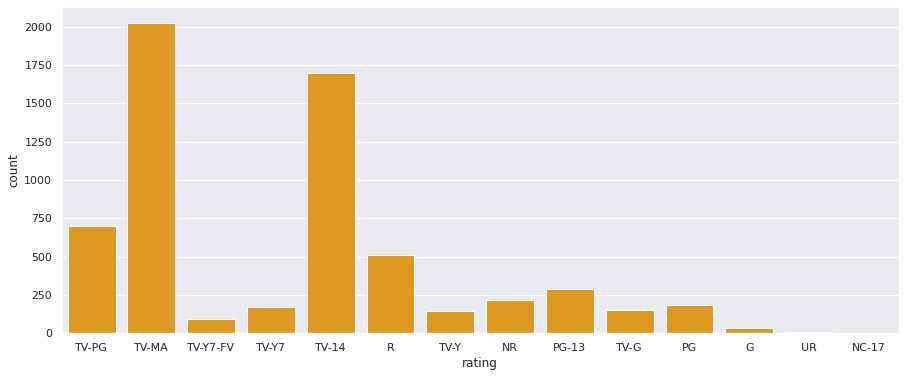

In [ ]:
#Distribution on different types of Rating
sns.set(rc={'figure.figsize':(15,6)})
sns.countplot(x=df['rating'],color='#fca103')

## Top 10 oldest TV_Shows on Netflix

In [ ]:
#Sorting the release_year to get the oldest TV_Shows
tvshow_sort = tvshow_df.sort_values("release_year", ascending = True)
tv_show_oldest = tvshow_sort[['title', "release_year"]][:10] #Filtering the rows and columns at the same time
tv_show_oldest


fig = go.Figure(data=[go.Table(
    header=dict(values=list(['Title of the TV SHOW','Year of Release']),
                fill_color='#fca103',
                align='center',font=dict(color='Black', size=16),height=40),
    cells=dict(values=[tv_show_oldest.title, tv_show_oldest.release_year],
               fill_color='Black',
               align='center',font=dict(color='White', size=12)))
])

fig.show()


## Top 10 oldest Movies on Netflix

In [ ]:
movie_sort = movie_df.sort_values("release_year", ascending = True)
movie_oldest = movie_sort[['title', "release_year"]][:10] #Filtering the rows and columns at the same time
movie_oldest
#movie_oldest_table = ff.create_table(movie_oldest,annotation_offset=0.45)
#movie_oldest_table.show()
list_1 = ['Title of the Movie','Year of Release']
fig = go.Figure(data=[go.Table(
    header=dict(values=list(list_1),
                fill_color='#fca103',
                align='center',font=dict(color='Black', size=16),height=40),
    cells=dict(values=[movie_oldest.title, movie_oldest.release_year],
               fill_color='Black',
               align='center',font=dict(color='White', size=12)))
])

fig.show()

In [ ]:
duration_int = movie_df['duration']
type(duration_int)
tv_show_duration = tvshow_df['season_count']
type(tv_show_duration)
duration_int.astype(int)

0        90
1        94
4        99
6       110
7        60
       ... 
5575    106
5577     70
5578    102
5579     88
5580    109
Name: duration, Length: 4264, dtype: int64

## Distribution of movie 'Duration'

In [ ]:
hist_data = [duration_int.astype(int)]
group_labels = ['Movie Duration'] # name of the dataset

fig_duration = ff.create_distplot(hist_data, group_labels,bin_size=0.7, curve_type= 'normal', colors=["#fca103",'#000000'],rug_text=None,show_rug=False)
fig_duration.show()

## Distribution of TV_Show Seasons

In [ ]:
#distplot with normal distribution
hist_TV_data = [tv_show_duration.astype(int)]
tv_group_labels = ['Number of Seasons'] # name of the dataset

TV_fig_duration = ff.create_distplot(hist_TV_data, tv_group_labels,bin_size=0.5, curve_type= 'normal', colors=["#fca103",'#000000'],show_rug=False)
TV_fig_duration.show()

More Analysis in progress. Coming Soon!!


